In [1]:
#following along with CNN - Codealong
#for create new folders and move the new files in there
import os, shutil

In [2]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import warnings
warnings.filterwarnings('ignore')


from numpy.random import seed
seed(42)

import os
import tqdm
from os import walk

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
DataAug = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range = 45,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.2, # Randomly zoom image 
    width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
    horizontal_flip = True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [4]:
# get all the data in the directory xray/test (624 images), and reshape them
test_generator_base = ImageDataGenerator(rescale= 1./255).flow_from_directory("Data/chest_xray/chest_xray/test/",
                                                                         batch_size = 624)

# get all the data in the directory xray/val (16 images), and reshape them
val_generator_base = ImageDataGenerator(1./255).flow_from_directory("Data/chest_xray/chest_xray/val/",
                                                               batch_size = 16)

# get all the data in the directory xray/train (5216 images), and reshape them
train_generator_base = ImageDataGenerator(1./255).flow_from_directory("Data/chest_xray/chest_xray/train/",
                                              batch_size = 5216)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [5]:
train_images, train_labels = next(train_generator_base)

test_images, test_labels = next(test_generator_base)

val_images, val_labels = next(val_generator_base)

In [6]:
len(train_labels)

5216

In [7]:
# data_aug = data_aug()
# data_aug.fit(train_images)

In [8]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 5216
Number of testing samples: 624
Number of validation samples: 16
train_images shape: (5216, 256, 256, 3)
train_labels shape: (5216, 2)
test_images shape: (624, 256, 256, 3)
test_labels shape: (624, 2)
val_images shape: (16, 256, 256, 3)
val_labels shape: (16, 2)


In [9]:
# get all the data in the directory xray/test (624 images), and reshape them
test_generator = DataAug.flow_from_directory("Data/chest_xray/chest_xray/test/", 
                                                                              batch_size = 624, 
                                                                             color_mode= "grayscale")

# get all the data in the directory xray/val (16 images), and reshape them
val_generator = DataAug.flow_from_directory("Data/chest_xray/chest_xray/val/", 
                                                                    batch_size = 16,
                                                                   color_mode= "grayscale")

# get all the data in the directory xray/train (5216 images), and reshape them
train_generator = DataAug.flow_from_directory("Data/chest_xray/chest_xray/train/", 
                                                                      batch_size = 5216, 
                                                                     color_mode= "grayscale")

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [10]:
train_images, train_labels = next(train_generator)

test_images, test_labels = next(test_generator)

val_images, val_labels = next(val_generator)

In [11]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 5216
Number of testing samples: 624
Number of validation samples: 16
train_images shape: (5216, 256, 256, 1)
train_labels shape: (5216, 2)
test_images shape: (624, 256, 256, 1)
test_labels shape: (624, 2)
val_images shape: (16, 256, 256, 1)
val_labels shape: (16, 2)


In [12]:
#reshaping data
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 65536)
(624, 65536)
(16, 65536)


In [13]:
#reshaping label
train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [14]:

print(train_y.shape)
print(test_y.shape)
print(val_y.shape)

(5216, 1)
(624, 1)
(16, 1)


In [15]:
train_y.shape

(5216, 1)

In [16]:
train_labels

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

<AxesSubplot:ylabel='count'>

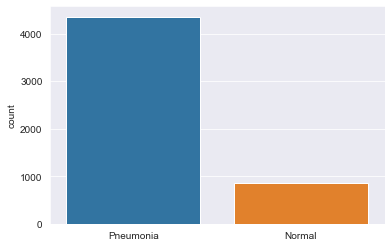

In [17]:
import pandas as pd
import seaborn as sns

l = []
for i in train_img:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")
sns.set_style("darkgrid")
sns.countplot(l)

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)

In [19]:
lr.fit(train_img, train_y)

LogisticRegression(random_state=42)

In [20]:
lr.score(test_img,test_y)

0.6778846153846154

In [21]:
y_pred = lr.predict(test_img)

In [22]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix, plot_roc_curve, \
make_scorer, recall_score, precision_score, f1_score

In [23]:
recall_score(test_y, y_pred)

0.2905982905982906

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(criterion = "entropy", max_depth = 15,
                          min_samples_split= 5, n_estimators= 700,
                          max_features = 'log2', random_state = 42)

In [25]:
rf.fit(train_img, train_y)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_split=5, n_estimators=700, random_state=42)

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf, test_img, test_y, cv = 5)

array([0.768     , 0.72      , 0.76      , 0.728     , 0.78225806])

In [27]:
print(f'Test score of random forest model: {rf.score(test_img, test_y)}')

Test score of random forest model: 0.7291666666666666


In [28]:
#baseline model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(65536,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                1310740   
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 147       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 1,310,933
Trainable params: 1,310,933
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='sgd',
             loss = 'binary_crossentropy',
             metrics =  ['accuracy', tf.keras.metrics.Recall()])

histoire = model.fit(train_img,
                    train_y,
                    epochs = 50,
                    batch_size = 32,
                    validation_data=(val_img,val_y))

Epoch 1/50
163/163 [==============================] - 1s 7ms/step - loss: 735.2108 - accuracy: 0.7347 - recall: 0.0075 - val_loss: 0.7176 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 2/50
163/163 [==============================] - 1s 6ms/step - loss: 0.5941 - accuracy: 0.7429 - recall: 0.0000e+00 - val_loss: 0.7538 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 3/50
163/163 [==============================] - 1s 6ms/step - loss: 0.5776 - accuracy: 0.7429 - recall: 0.0000e+00 - val_loss: 0.7833 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 4/50
163/163 [==============================] - 1s 6ms/step - loss: 0.5724 - accuracy: 0.7429 - recall: 0.0000e+00 - val_loss: 0.8011 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 5/50
163/163 [==============================] - 1s 6ms/step - loss: 0.5708 - accuracy: 0.7429 - recall: 0.0000e+00 - val_loss: 0.8126 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 6/50
163/163 [==============================] - 1s 6ms/s

163/163 [==============================] - 1s 6ms/step - loss: 0.5701 - accuracy: 0.7429 - recall: 0.0000e+00 - val_loss: 0.8286 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 45/50
163/163 [==============================] - 1s 6ms/step - loss: 0.5701 - accuracy: 0.7429 - recall: 0.0000e+00 - val_loss: 0.8276 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 46/50
163/163 [==============================] - 1s 6ms/step - loss: 0.5700 - accuracy: 0.7429 - recall: 0.0000e+00 - val_loss: 0.8282 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 47/50
163/163 [==============================] - 1s 6ms/step - loss: 0.5701 - accuracy: 0.7429 - recall: 0.0000e+00 - val_loss: 0.8273 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 48/50
163/163 [==============================] - 1s 6ms/step - loss: 0.5700 - accuracy: 0.7429 - recall: 0.0000e+00 - val_loss: 0.8281 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 49/50
163/163 [==============================] - 1s 6ms/step 

In [30]:
results_train = model.evaluate(train_img, train_y)

163/163 [==============================] - 1s 3ms/step - loss: 0.5700 - accuracy: 0.7429 - recall: 0.0000e+00


In [31]:
results_test = model.evaluate(test_img,test_y)

20/20 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.6250 - recall: 0.0000e+00


In [32]:
results_train

[0.5699957013130188, 0.7429064512252808, 0.0]

In [33]:
results_test

[0.6947669982910156, 0.625, 0.0]

In [34]:
yhat_classes = model.predict_classes(test_img, verbose = 0)
yhat_classes = yhat_classes[:, 0]
recall_score(test_y, yhat_classes)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.0

In [35]:

# from keras import regularizers

# # CNN build
# np.random.seed(123)
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', 
#                         padding = "same",
#                        input_shape = (256,256,1)))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(32, (4, 4), activation='relu', 
#                        padding = 'same'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu',
#                        padding= 'same'))
# model.add(layers.MaxPooling2D((2, 2)))


# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation = 'relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.summary()

# model.compile(loss='binary_crossentropy',
#               optimizer="sgd",
#               metrics=['accuracy'])

In [36]:
# history = model.fit(train_images,
#                     train_y,
#                     steps_per_epoch= 20,
#                     epochs=20,
#                     batch_size=16,
#                     validation_data=(val_images, val_y))
# print(f"Training Score of first convolution neural network: {model.evaluate(train_images, train_y)}")
# print(f"Test Score of first convolution neural network: {model.evaluate(test_images, test_y)}")

In [37]:
# yhat_classes = model.predict_classes(test_images, verbose = 0)
# yhat_classes = yhat_classes[:, 0]
# recall_score(test_y, yhat_classes)

In [38]:
# model.summary()

In [39]:
from keras.models import Sequential
from keras import regularizers

model = models.Sequential()
model = Sequential()
model.add(layers.Conv2D(32 , (3,3) , kernel_regularizer = regularizers.l2(.02), strides = 1 , padding = 'same' , activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2) ,  strides = 2 , padding = 'same'))
model.add(layers.Conv2D(64 , (3,3) , kernel_regularizer = regularizers.l2(.02), strides = 1 , padding = 'same' , activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(layers.Conv2D(64 , (3,3) , kernel_regularizer = regularizers.l2(.02), strides = 1 , padding = 'same' , activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(layers.Conv2D(128 , (3,3) , kernel_regularizer = regularizers.l2(.02), strides = 1 , padding = 'same' , activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(layers.Conv2D(256 , (3,3) , kernel_regularizer = regularizers.l2(.02), strides = 1 , padding = 'same' , activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(layers.Flatten())
model.add(layers.Dense(units = 128 , kernel_regularizer = regularizers.l2(.02), activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units = 1 , kernel_regularizer = regularizers.l2(.02), activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy',tf.keras.metrics.Recall()])


model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc',tf.keras.metrics.Recall()])

history = model.fit(train_images,
                    train_y,
                    steps_per_epoch=25,
                    epochs=20,
                    batch_size=8,
                    validation_data=(val_images, val_y))



print(f"\nTraining Score: {model.evaluate(train_images, train_y)}")
print(f"\nTest Score: {model.evaluate(test_images, test_y)}")

Epoch 1/20
25/25 [==============================] - 20s 795ms/step - loss: 13.7623 - acc: 0.6850 - recall_2: 0.4426 - val_loss: 13.0804 - val_acc: 0.4375 - val_recall_2: 0.8750
Epoch 2/20
25/25 [==============================] - 20s 784ms/step - loss: 12.5816 - acc: 0.8000 - recall_2: 0.4200 - val_loss: 12.6336 - val_acc: 0.6250 - val_recall_2: 0.7500
Epoch 3/20
25/25 [==============================] - 19s 776ms/step - loss: 12.4305 - acc: 0.7750 - recall_2: 0.4444 - val_loss: 12.3546 - val_acc: 0.8125 - val_recall_2: 0.6250
Epoch 4/20
25/25 [==============================] - 19s 779ms/step - loss: 12.0616 - acc: 0.8000 - recall_2: 0.4400 - val_loss: 12.0689 - val_acc: 0.8750 - val_recall_2: 0.7500
Epoch 5/20
25/25 [==============================] - 20s 795ms/step - loss: 11.7259 - acc: 0.8400 - recall_2: 0.5227 - val_loss: 11.9618 - val_acc: 0.8750 - val_recall_2: 0.7500
Epoch 6/20
25/25 [==============================] - 20s 791ms/step - loss: 11.5521 - acc: 0.8300 - recall_2: 0.5918

In [40]:

print(f"\nTraining Score: {model.evaluate(train_images, train_y)}")
print(f"\nTest Score: {model.evaluate(test_images, test_y)}")

163/163 [==============================] - 51s 313ms/step - loss: 9.4519 - acc: 0.7433 - recall_2: 0.0015

Training Score: [9.451904296875, 0.7432898879051208, 0.0014914242783561349]
20/20 [==============================] - 6s 308ms/step - loss: 10.2921 - acc: 0.6250 - recall_2: 0.0000e+00

Test Score: [10.292149543762207, 0.625, 0.0]


In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)       

In [55]:
model = Sequential()

model.add(layers.Conv2D(filters=16, kernel_size=3, kernel_regularizer = regularizers.l2(.01),  activation='relu', input_shape=(256,256,1)))
model.add(layers.MaxPool2D(pool_size=2, strides=2))


model.add(layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer = regularizers.l2(.01), activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=2))


model.add(layers.Conv2D(filters=64, kernel_size=3, kernel_regularizer = regularizers.l2(.01), activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=2))


model.add(layers.Conv2D(filters=64, kernel_size=3, kernel_regularizer = regularizers.l2(.01), activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=2))


model.add(layers.Flatten())
model.add(layers.Dense(units=128, kernel_regularizer = regularizers.l2(.01), activation='relu'))


model.add(layers.Dense(units=1, kernel_regularizer = regularizers.l2(.01), activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 254, 254, 16)      160       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 64)       

In [56]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy',tf.keras.metrics.Recall()])  

from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
# learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
#                                                                patience = 2, 
#                                                                verbose=1, 
#                                                                factor=0.3, 
#                                                                min_lr=0.000001)

history = model.fit(train_images, 
                    train_y,  
                    epochs=12,
                    steps_per_epoch = 80,
                    validation_data = (val_images, val_y), 
                    callbacks = [earlystopping])

print(f"\nTraining Score: {model.evaluate(train_images, train_y)}")
print(f"\nTest Score: {model.evaluate(test_images, test_y)}")

Epoch 1/12
80/80 [==============================] - 74s 930ms/step - loss: 6.3215 - accuracy: 0.7408 - recall_6: 0.4564 - val_loss: 3.3402 - val_accuracy: 0.7500 - val_recall_6: 0.6250
Epoch 2/12
80/80 [==============================] - 75s 935ms/step - loss: 2.2249 - accuracy: 0.8507 - recall_6: 0.7010 - val_loss: 4.4373 - val_accuracy: 0.6250 - val_recall_6: 0.2500
Epoch 3/12
80/80 [==============================] - 73s 915ms/step - loss: 1.8044 - accuracy: 0.8744 - recall_6: 0.7286 - val_loss: 2.2462 - val_accuracy: 0.7500 - val_recall_6: 0.6250
Epoch 4/12
80/80 [==============================] - 76s 951ms/step - loss: 1.6505 - accuracy: 0.8388 - recall_6: 0.6734 - val_loss: 2.6398 - val_accuracy: 0.5625 - val_recall_6: 0.2500
Epoch 5/12
80/80 [==============================] - 74s 926ms/step - loss: 1.4048 - accuracy: 0.8767 - recall_6: 0.7315 - val_loss: 1.9142 - val_accuracy: 0.7500 - val_recall_6: 0.6250
Epoch 6/12
80/80 [==============================] - 75s 932ms/step - loss: 

In [45]:
train_images.shape

(5216, 256, 256, 1)

In [46]:
# Test Normalization

train_images_normalized = train_images/255

test_images_normalized = test_images/255

val_images_normalized = val_images/255

In [47]:
model = Sequential()

model.add(layers.Conv2D(filters=16, kernel_size=3, kernel_regularizer = regularizers.l2(.01),  activation='relu', input_shape=(256,256,1)))
model.add(layers.MaxPool2D(pool_size=2, strides=2))


model.add(layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer = regularizers.l2(.01), activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=2))


model.add(layers.Conv2D(filters=64, kernel_size=3, kernel_regularizer = regularizers.l2(.01), activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=2))


model.add(layers.Conv2D(filters=64, kernel_size=3, kernel_regularizer = regularizers.l2(.01), activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(units=128, kernel_regularizer = regularizers.l2(.01), activation='relu'))


model.add(layers.Dense(units=1, kernel_regularizer = regularizers.l2(.01), activation='sigmoid'))
model.summary()

model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy',tf.keras.metrics.Recall()])  

from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
# learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
#                                                                patience = 2, 
#                                                                verbose=1, 
#                                                                factor=0.3, 
#                                                                min_lr=0.000001)

history = model.fit(train_images_normalized, 
                    train_y,  
                    epochs=20,
                    steps_per_epoch = 100,
                    validation_data = (val_images_normalized, val_y), 
                    callbacks = [earlystopping])

print(f"\nTraining Score: {model.evaluate(train_images_normalized, train_y)}")
print(f"\nTest Score: {model.evaluate(test_images_normalized, test_y)}")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 16)      160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)       

In [48]:
test_images.shape

(624, 256, 256, 1)

In [49]:
train_labels.shape

(5216, 2)

In [52]:
model = models.Sequential()

model.add(layers.Conv2D(filters = 32, strides = (1,1), kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))


model.add(layers.Conv2D(filters = 64, strides = (2,2), kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(filters = 128, strides = (2,2), kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))


model.add(layers.Conv2D(filters = 256, strides = (2,2), kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))


model.add(layers.Dense(64, activation = 'relu'))


model.add(layers.Dense(32, activation = 'relu'))


model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'BinaryCrossentropy', 
             optimizer = 'adam', 
             metrics = ['accuracy', tf.keras.metrics.Recall()])




history = model.fit(train_images,
                   train_y, 
                   steps_per_epoch = 15, 
                   epochs = 10,
                   validation_data = (val_images, val_y))
model.summary()



print(f"\nTraining Score: {model.evaluate(train_images, train_y)}")
print(f"\nTest Score: {model.evaluate(test_images, test_y)}")


Epoch 1/10
15/15 [==============================] - 74s 5s/step - loss: 1.1242 - accuracy: 0.6286 - recall_5: 0.2476 - val_loss: 0.7870 - val_accuracy: 0.5000 - val_recall_5: 0.0000e+00
Epoch 2/10
15/15 [==============================] - 71s 5s/step - loss: 0.5033 - accuracy: 0.7540 - recall_5: 0.0955 - val_loss: 1.1404 - val_accuracy: 0.6250 - val_recall_5: 0.2500
Epoch 3/10
15/15 [==============================] - 70s 5s/step - loss: 0.3948 - accuracy: 0.8046 - recall_5: 0.5503 - val_loss: 1.4400 - val_accuracy: 0.8125 - val_recall_5: 0.6250
Epoch 4/10
15/15 [==============================] - 74s 5s/step - loss: 0.3293 - accuracy: 0.8514 - recall_5: 0.7196 - val_loss: 1.6575 - val_accuracy: 0.6875 - val_recall_5: 0.3750
Epoch 5/10
15/15 [==============================] - 71s 5s/step - loss: 0.2848 - accuracy: 0.8738 - recall_5: 0.7763 - val_loss: 1.6209 - val_accuracy: 0.6875 - val_recall_5: 0.3750
Epoch 6/10
15/15 [==============================] - 70s 5s/step - loss: 0.2538 - accur

0.5726495726495726

In [53]:
# model = Sequential()
# model.add(layers.Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' ))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(layers.Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(layers.Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(layers.Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(layers.Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(layers.Flatten())
# model.add(layers.Dense(units = 128 , activation = 'relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(units = 1 , activation = 'sigmoid'))
# model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy', tf.keras.metrics.Recall()])
# # model.summary()

# learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

# history = model.fit(train_images,
#                     train_y,
#                     epochs = 20,
#                     validation_data = (val_images, val_y),
#                     callbacks = [learning_rate_reduction])

# print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])

# print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")


In [54]:
# print("Loss of the model is - " , model.evaluate(train_images,train_y)[0])

# print("Accuracy of the model is - " , model.evaluate(test_images,test_y)[1]*100 , "%")